In [1]:
from datetime import datetime as dt
from datetime import timedelta as td
import sys

sys.path.append('/home/vinc/projects/mader.xyz/FlaskApp')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import chronos
from chronos import load_raw
from chronos import stats

In [4]:
chat_name = 'Selina Patent'
word = 'lieb dich|liebe dich|love you'

In [15]:
x1, y1 = chronos.stats.social.word_occurences_in_IM(
    word, chat_name=chat_name, msg_type='received'
)
x1, y1 = stats.time_series.reshape.into_monthly_time_series(x1, y1)

x2, y2 = chronos.stats.social.word_occurences_in_IM(
    word, chat_name=chat_name, msg_type='sent'
)
x2, y2 = stats.time_series.reshape.into_monthly_time_series(x2, y2)

In [16]:
x1 = [dt.fromtimestamp(i) for i in x1]
x2 = [dt.fromtimestamp(i) for i in x2]

(-26.0, 26.0)

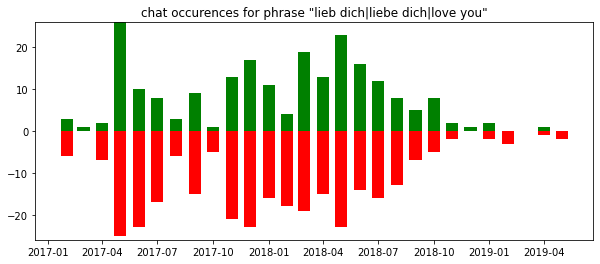

In [17]:
plt.figure(figsize=(10, 4))
plt.title(f'chat occurences for phrase "{word}"')

plt.bar(x1, y1, width=td(days=20), color='green')
plt.bar(x2, -np.array(y2), width=td(days=20), color='red')

y_max = max([max(y1), max(y2)])
plt.ylim(-y_max, y_max)

# plot multiple patterns/phrases against each other

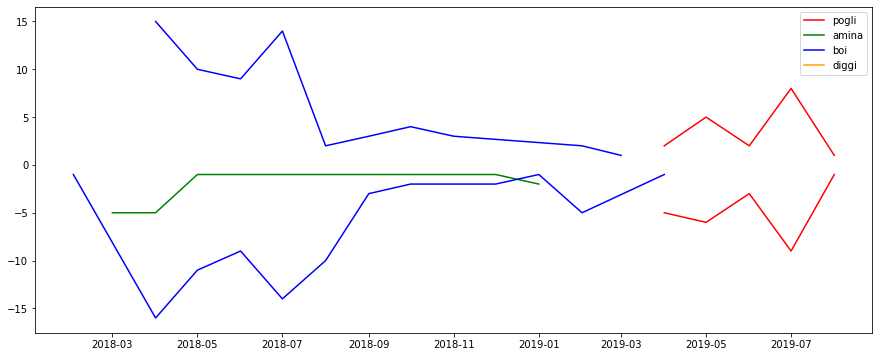

In [40]:
patterns = [
    #'schatz|liebling|liebste|liebster',
    #'ich liebe dich|love you',
    #'schluss',
    'pogli',
    'amina',
    'boi',
    'diggi'
]

colors = ['red', 'green', 'blue', 'orange']

plt.figure(figsize=(15, 6))
for idx, p in enumerate(patterns):
    x1, y1 = chronos.stats.social.word_occurences_in_IM(
        p, chat_name=chat_name, msg_type='received'
    )
    x1, y1 = stats.time_series.reshape.into_monthly_time_series(x1, y1)

    x2, y2 = chronos.stats.social.word_occurences_in_IM(
        p, chat_name=chat_name, msg_type='sent'
    )
    x2, y2 = stats.time_series.reshape.into_monthly_time_series(x2, y2)
    
    x1 = [dt.fromtimestamp(i) for i in x1]
    x2 = [dt.fromtimestamp(i) for i in x2]
    
    plt.plot(x1, y1, color=colors[idx])
    plt.plot(x2, -np.array(y2), color=colors[idx], label=p)

plt.legend()

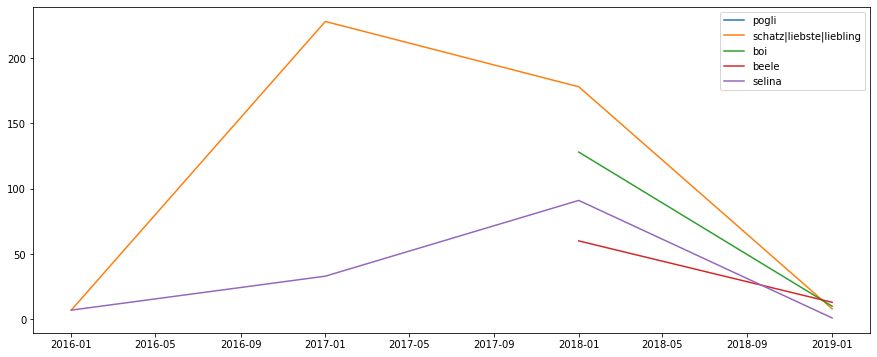

In [5]:
patterns = [
    #'schatz|liebling|liebste|liebster',
    #'ich liebe dich|love you',
    #'schluss',
    'pogli',
    'schatz|liebste|liebling',
    'boi',
    'beele',
    'selina',
]

#colors = ['red', 'green', 'blue', 'orange', 'cyan', 'pink']

plt.figure(figsize=(15, 6))
for idx, p in enumerate(patterns):
    x1, y1 = chronos.stats.social.word_occurences_in_IM(
        p, chat_name=chat_name, msg_type='all'
    )
    x1, y1 = stats.time_series.reshape.into_yearly_time_series(x1, y1)
    x1 = [dt.fromtimestamp(i) for i in x1]
    
    plt.plot(
        x1, y1, label=p,
        #color=colors[idx]
    )

plt.legend()